# Telco Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import warnings
warnings.filterwarnings('ignore') 

sns.set(style="whitegrid")

# view data files stored in 'data' directory
print(os.listdir('./data'))

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [2]:
df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Pre-processing

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### We see that the TotalCharges column has type object though it represents a numeric value, therefore we will change the column type to float

In [4]:
#change data type of TotalCharges column to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [5]:
#find missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### We see that there are 11 entries with missing data, all of which are in the TotalCharges column. Let's further examine these rows and determine the best way to handle

In [6]:
#return rows with missing values
missing_rows = df[df['TotalCharges'].isnull()]
missing_rows.head(11)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [7]:
#Each row with a missing TotalCharges value has a tenure of 0 months 
#Lets see if there are other rows in the dataframe with a tenure value of 0

no_tenure = df[df['tenure'] == 0]
print(len(no_tenure))

11


#### We see that for every row with a missing TotalCharges value the tenure column is 0, meaning that the customer has not yet been around for a full month. It is likely the case that these customers have yet to pay any money to the company so we will assume their total charges are $0

In [8]:
#replace NaN values in TotalCharges with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

#check to make sure that there are no longer missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# drop the customerID column (useless information)
df.drop(columns = ['customerID'], inplace = True)

## Exploratory Data Analysis

#### We see that month to month contracts, no online security and no tech support are positively correlated with churn while tenure and two year contracts are negatively correlated

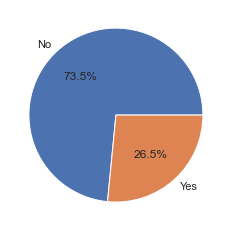

In [10]:
#plot customer churn percentage
fig_8, ax_8 = plt.subplots(figsize = (6,4))
ax_8.pie(df['Churn'].value_counts().values/len(df), autopct = '%.1f%%', labels = ['No','Yes'])
plt.show()

#### A) Demographics
####      *Rougly 50/50 distribution between male and female customers with no impact on churn*

[Text(0, -20, '50.48'), Text(0, -20, '49.52')]

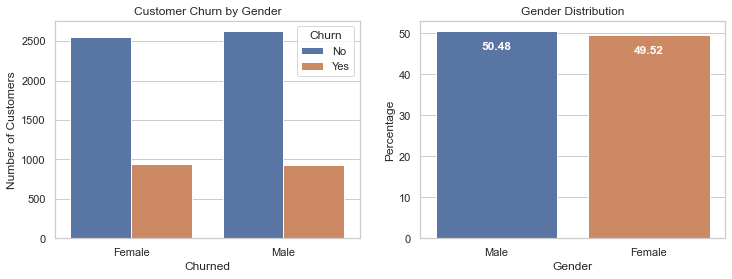

In [11]:
#plot the percentage of male and female

fig_1, ax_1 = plt.subplots(1,2, figsize = (12,4))

data = pd.DataFrame(df.groupby('gender')['Churn'].value_counts())
data = data.rename({"Churn": "Number of Customers"}, axis = 1).reset_index()

ax = sns.barplot(x = 'gender', y = 'Number of Customers', data = data, hue = 'Churn', ax = ax_1[0])

ax_1[0].set_title('Customer Churn by Gender')
ax_1[0].set_xlabel('Churned')
ax_1[0].set_ylabel('Number of Customers')

data2 = pd.DataFrame(df['gender'].value_counts()/len(df) * 100).reset_index()
data2.columns = ['gender','percentage']

ax = sns.barplot(x = 'gender', y = 'percentage', data = data2, ax = ax_1[1])
ax_1[1].set_title('Gender Distribution')
ax_1[1].set_xlabel('Gender')
ax_1[1].set_ylabel('Percentage')
ax_1[1].bar_label(ax.containers[0], padding = -20, fmt = '%.2f', fontsize = 12, color = 'white', weight = 'bold')


#### Senior Citizens make up roughly 16% of the customer base. While non-senior citizens churn at a rate of 24%, senior citizens churn at a rate of nearly 42% 

In [12]:
senior_df = df['SeniorCitizen'].value_counts().to_frame().reset_index(drop = True)
senior_df['percentage_total'] = senior_df['SeniorCitizen']/len(df) * 100
senior_df['number_churned'] = df[df['Churn'] == 'Yes']['SeniorCitizen'].value_counts()
senior_df['churned_percentage'] = senior_df['number_churned']/senior_df['SeniorCitizen'] * 100
senior_df['senior'] = ['No','Yes']

senior_df.head()

,SeniorCitizen,percentage_total,number_churned,churned_percentage,senior
0,5901,83.785319,1393,23.606168,No
1,1142,16.214681,476,41.681261,Yes


[Text(0, -20, '23.61'), Text(0, -20, '41.68')]

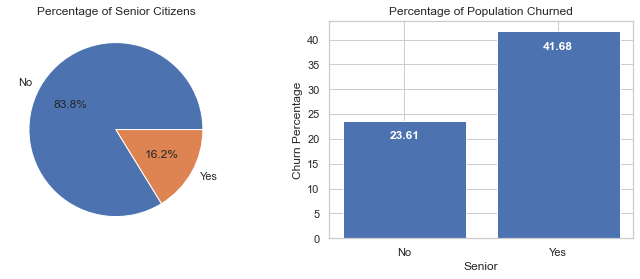

In [13]:
fig_2, ax_2 = plt.subplots(1,2,figsize = (12,4))

ax_2[0].pie(senior_df['percentage_total'], autopct = '%.1f%%', labels = senior_df['senior'])
ax_2[1].bar(x = 'senior', height = 'churned_percentage', data = senior_df)
 
ax_2[0].set_title('Percentage of Senior Citizens')

ax_2[1].set_title('Percentage of Population Churned')
ax_2[1].set_xlabel('Senior')
ax_2[1].set_ylabel('Churn Percentage')
ax_2[1].bar_label(ax_2[1].containers[0], padding = -20, fmt = '%.2f', fontsize = 12, color = 'white', weight = 'bold')


#### Customers without a partner or dependents make up the largest portion of the population, and these customers also have the highest churn percentage

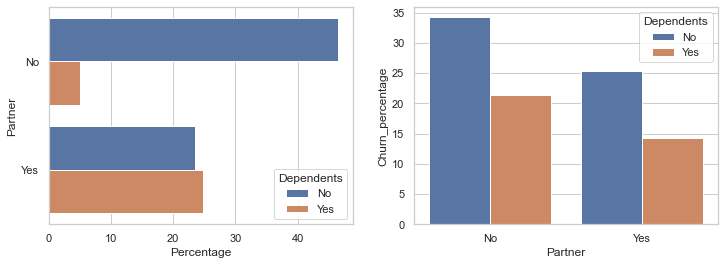

In [14]:
#percentage of customers with dependents and partners
partner_dependents = df.groupby(['Partner','Dependents']).size().to_frame().reset_index()
partner_dependents.columns = ['Partner', 'Dependents', 'Count']
partner_dependents['Percentage'] = partner_dependents['Count']/len(df) * 100

#calculate churn for this population
part_dep_churn = df[df['Churn'] == 'Yes'].groupby(['Partner','Dependents']).size().to_frame().reset_index()
part_dep_churn.columns = ['Partner', 'Dependents', 'Churned']
partner_dependents['Churn'] = part_dep_churn['Churned']
partner_dependents['Churn_percentage'] = partner_dependents['Churn']/partner_dependents['Count'] * 100


fig_3, ax_3 = plt.subplots(1,2, figsize = (12,4))
ax = sns.barplot(x = 'Percentage' , y = 'Partner' , hue = 'Dependents', data = partner_dependents, ax = ax_3[0])
ax = sns.barplot(x = 'Partner' , y = 'Churn_percentage' , hue = 'Dependents', data = partner_dependents, ax = ax_3[1])

#### B) Customer Account Information

Text(0.5, 0, 'Tenure (months)')

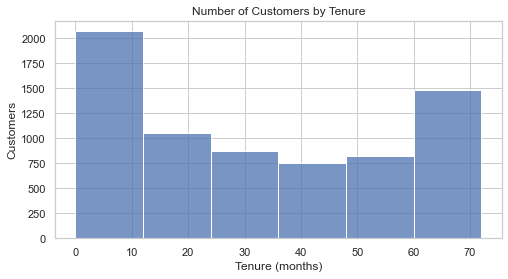

In [15]:
#Plot the distribution of customer tenure
fig_4, ax_4 = plt.subplots(figsize = (8,4))

ax_4 = sns.histplot(df['tenure'], binwidth = 12)

ax_4.set_title('Number of Customers by Tenure')
ax_4.set_ylabel('Customers')
ax_4.set_xlabel('Tenure (months)')

Text(0.5, 0, 'Contract')

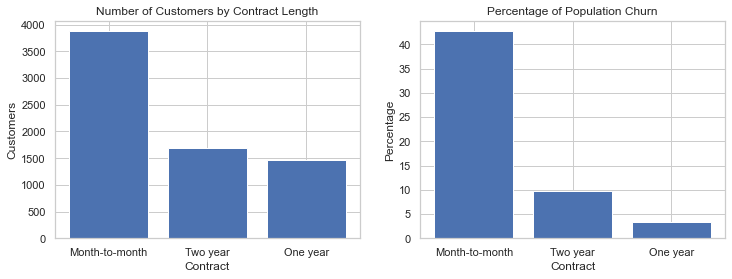

In [16]:
#plot the contract type distribution

contract_churn = df['Contract'].value_counts().to_frame().reset_index()
contract_churn.columns = ['Contract','Count']
contract_churn['Churn'] = df[df['Churn'] == 'Yes']['Contract'].value_counts().values
contract_churn['Percentage'] = contract_churn['Churn']/contract_churn['Count'] * 100

fig_5, ax_5 = plt.subplots(1,2,figsize = (12,4))

ax_5[0].bar(x = 'Contract' ,height = 'Count', data = contract_churn)
ax_5[0].set_title('Number of Customers by Contract Length')
ax_5[0].set_ylabel('Customers')
ax_5[0].set_xlabel('Contract')

ax_5[1].bar(x = 'Contract' ,height = 'Percentage', data = contract_churn)
ax_5[1].set_title('Percentage of Population Churn')
ax_5[1].set_ylabel('Percentage')
ax_5[1].set_xlabel('Contract')

Text(0.5, 0, 'Tenure(months)')

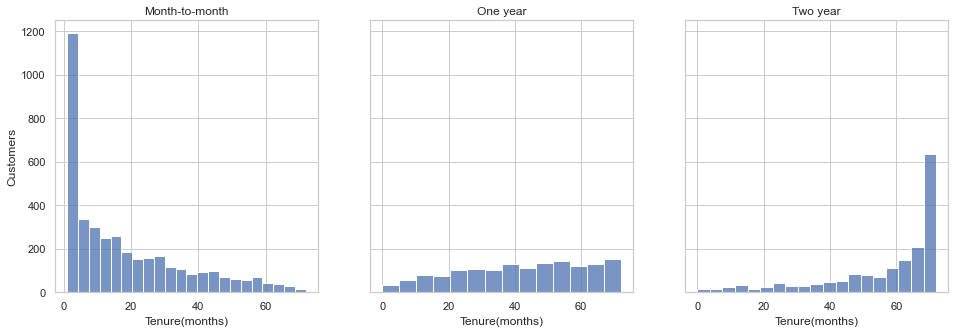

In [17]:
#visualize the tenure of contract categories

fig_6, ax_6 = plt.subplots(1,3,figsize = (16, 5), sharey = True)

ax = sns.histplot(df[df['Contract'] == 'Month-to-month']['tenure'], ax = ax_6[0])
ax.set_title('Month-to-month')
ax.set_xlabel('Tenure(months)')
ax.set_ylabel('Customers')

ax = sns.histplot(df[df['Contract'] == 'One year']['tenure'], ax = ax_6[1])
ax.set_title('One year')
ax.set_xlabel('Tenure(months)')

ax = sns.histplot(df[df['Contract'] == 'Two year']['tenure'], ax = ax_6[2])
ax.set_title('Two year')
ax.set_xlabel('Tenure(months)')


#### C) Customer Services Distribution

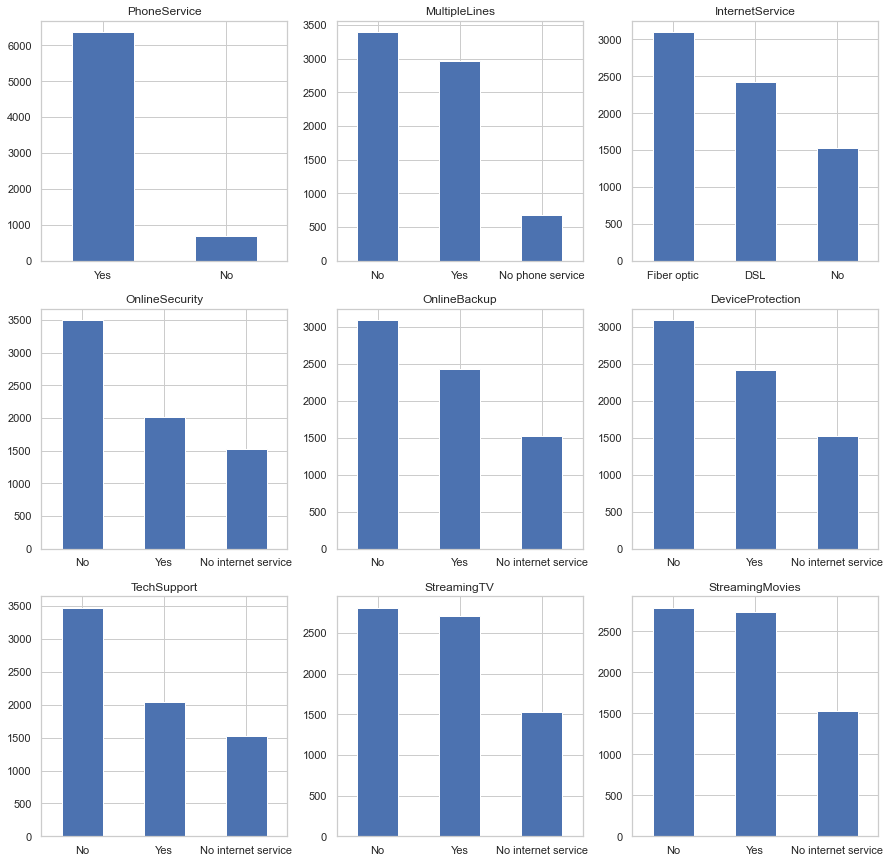

In [18]:
#visualize the distribution of each service
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

fig_7,ax_7 = plt.subplots(3,3,figsize = [15,15])

for i, service in enumerate(services):
    if i < 3:
        ax = df[service].value_counts().plot(kind = 'bar', ax = ax_7[0,i], rot = 0)  
    elif i >= 3 and i < 6:
        ax = df[service].value_counts().plot(kind = 'bar', ax = ax_7[1,i-3], rot = 0)  
    elif i >= 6:
        ax = df[service].value_counts().plot(kind = 'bar', ax = ax_7[2,i-6], rot = 0)
    ax.set_title(service)

#### D) Churn by payment method

Text(0.5, 0, 'Percentage')

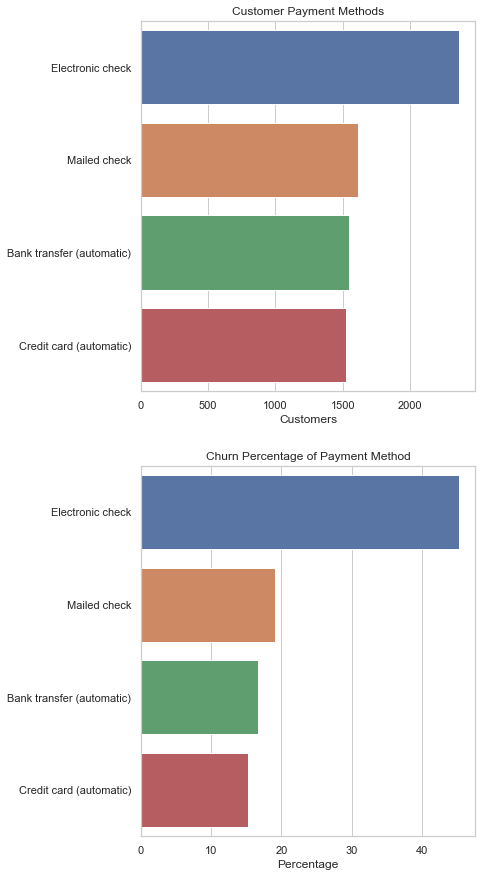

In [19]:
#plot the payment method distribution and churn

fig_9, ax_9 = plt.subplots(2,1,figsize = (6,15))

ax = sns.barplot(y = df['PaymentMethod'].value_counts().index, x = df['PaymentMethod'].value_counts().values, ax = ax_9[0])
ax_9[0].set_title('Customer Payment Methods')
ax_9[0].set_xlabel('Customers')

ax = sns.barplot(y = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts().index, x = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts().values/df['PaymentMethod'].value_counts().values*100, ax = ax_9[1])
ax_9[1].set_title('Churn Percentage of Payment Method')
ax_9[1].set_xlabel('Percentage')


#### E) Churn in relation to Monthly Charges

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

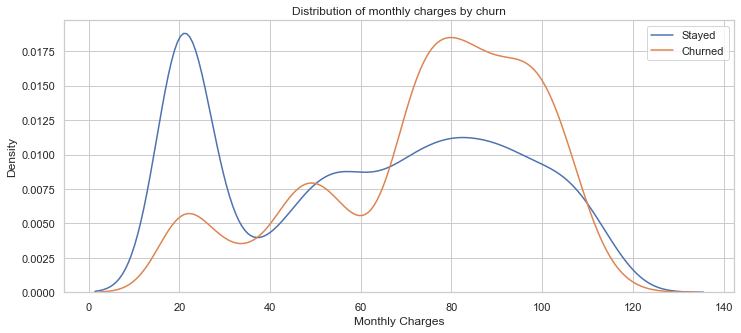

In [20]:
#plot histogram of monthly pricing and overlay churn
fig_10, ax_10 = plt.subplots(figsize = (12,5))

ax = sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], ax = ax_10)
ax = sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], ax = ax_10)

ax.legend(["Stayed","Churned"])
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

## Churn Predictive Modeling

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [22]:
#data preprocessing - turn categorical variables to numeric

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df2 = pd.get_dummies(df)
df2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [23]:
# scale all variables to range between 0 and 1

X = df2.drop(columns = ['Churn'])
Y = df2['Churn'].values

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [24]:
#split data into test and training

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 77)

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
#print intercept, and classes
print('intercept ', model.intercept_[0])
print('classes', model.classes_)
weights = pd.DataFrame({'coeff': model.coef_[0]}, 
             index=X_train.columns)
print(weights)

intercept  -1.0548364562390369
classes [0 1]
                                            coeff
SeniorCitizen                            0.194949
tenure                                  -2.726249
MonthlyCharges                          -0.023730
TotalCharges                             0.736336
gender_Female                            0.011385
gender_Male                             -0.010041
Partner_No                               0.035972
Partner_Yes                             -0.034628
Dependents_No                            0.044365
Dependents_Yes                          -0.043021
PhoneService_No                          0.123021
PhoneService_Yes                        -0.121676
MultipleLines_No                        -0.180553
MultipleLines_No phone service           0.123021
MultipleLines_Yes                        0.058876
InternetService_DSL                     -0.389826
InternetService_Fiber optic              0.478935
InternetService_No                      -0.087764
Onlin

<Figure size 432x288 with 0 Axes>

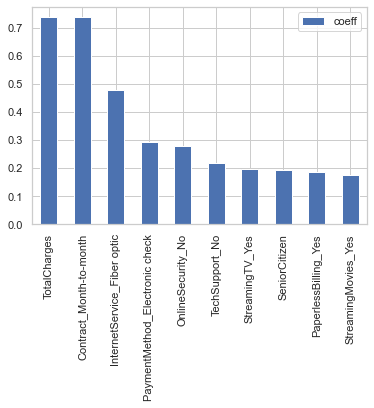

In [27]:
#visualize top 10 weights of predictors
plt.figure(figsize = (6,4))
weights.sort_values(by = 'coeff', ascending = False)[:10].plot(kind='bar')
plt.show()

<Figure size 432x288 with 0 Axes>

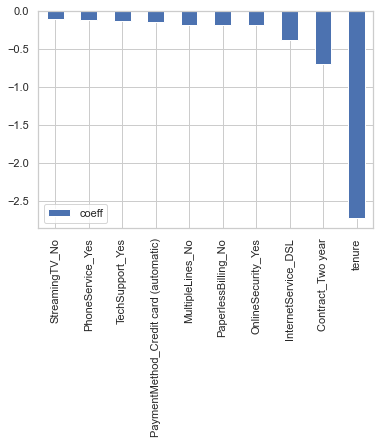

In [28]:
#visualize bottom 10 weights of predictors
plt.figure(figsize = (6,4))
weights.sort_values(by = 'coeff', ascending = False)[-10:].plot(kind='bar')
plt.show()

In [31]:
#model evaluation: model accuracy, confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
prediction_test = model.predict(X_test)
conf_mat = confusion_matrix(y_test, prediction_test, labels = [1,0])
print ('Model accuracy: ' + str(np.round(accuracy_score(y_test, prediction_test)*100,2)) + '%')
print('Confusion matrix \n', conf_mat)

Model accuracy: 80.08%
Confusion matrix 
 [[ 290  255]
 [ 166 1402]]


In [34]:
#model evaluation: precision, recall, specificity
from sklearn.metrics import precision_recall_fscore_support
results = precision_recall_fscore_support(y_test, prediction_test, labels = [1,0])
print('Precision: ', results[0][0])
print('Recall: ', results[1][0])
print('Specificity: ', conf_mat[1, 1] / sum(conf_mat[1, :]))

Precision:  0.6359649122807017
Recall:  0.5321100917431193
Specificity:  0.8941326530612245


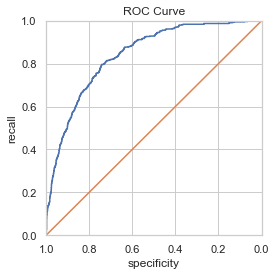

In [35]:
#ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], 
                                 pos_label=1)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.set_title('ROC Curve')


plt.tight_layout()
plt.show()

In [36]:
#AUC Score
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print('AUC Score:', auc_score)

AUC Score: 0.8401721353679086


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [ ]:
### 

7043